In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
data = pd.read_csv('100 Sales Records.csv')
data = pd.DataFrame(data)
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [3]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [4]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [5]:
data = data.astype({'Ship Date' : 'datetime64[ns]','Order Date' : 'datetime64[ns]'})
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

<Axes: >

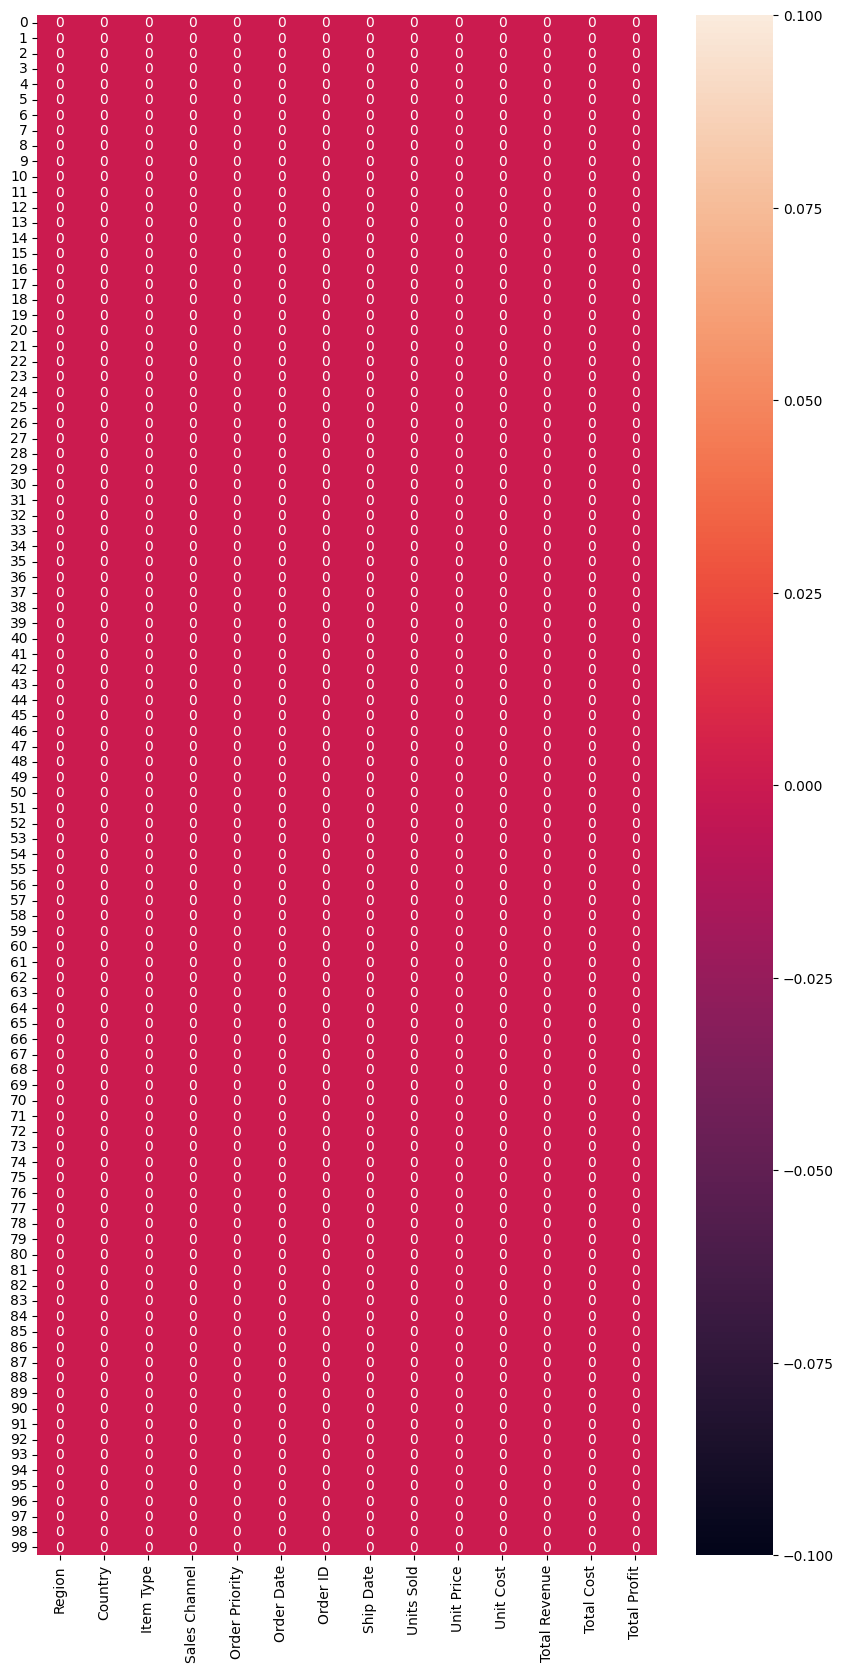

In [6]:
plt.figure(figsize = (10,20))
sns.heatmap(data.isnull(), annot = True)

In [7]:
data['Total Cost']= data['Total Cost'].astype('Float64')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.5,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


## Which region has the highest total revenue?

In [8]:
# Which region has the highest total revenue?
Highest_Total_Revenue = data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()

'Sub-Saharan Africa'

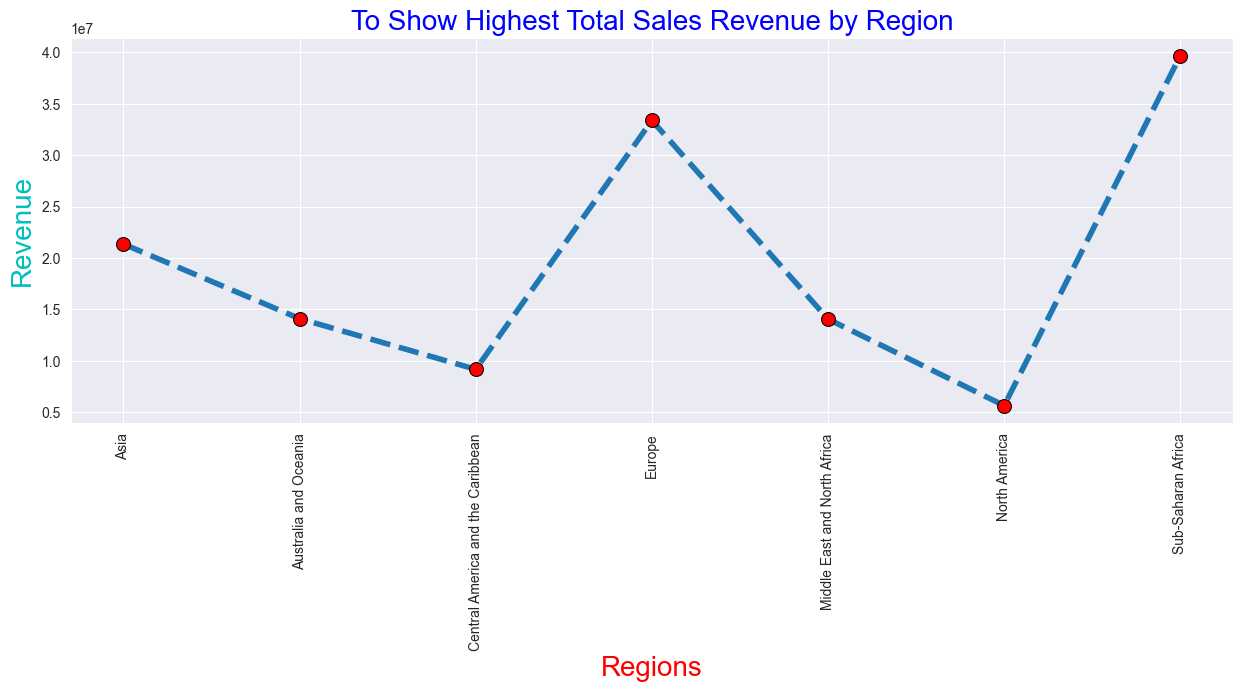

In [9]:
group_data = data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.lineplot(data = group_data, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10, 
             markerfacecolor ='red', markeredgecolor ='black')

plt.xticks(rotation = 90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Revenue', fontsize = 20, color = 'c')
plt.show()

## What is the average unit price and unit cost for each item type?

In [10]:
# What is the average unit price and unit cost for each item type?
Item_Type_Avg_Price = data.groupby(data['Item Type'])['Unit Price'].mean()
Item_Type_Avg_Cost = data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost = pd.DataFrame({'Average Unit Price' : Item_Type_Avg_Price, 'Average Unit Cost' : Item_Type_Avg_Cost})
Avg_Price_Cost

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


## Which country has the highest total profit?

In [11]:
# Which country has the highest total profit?
Highest_Total_Profit = data.groupby(data['Country'])['Total Profit'].sum()
Highest_Total_Profit.idxmax()

'Djibouti'

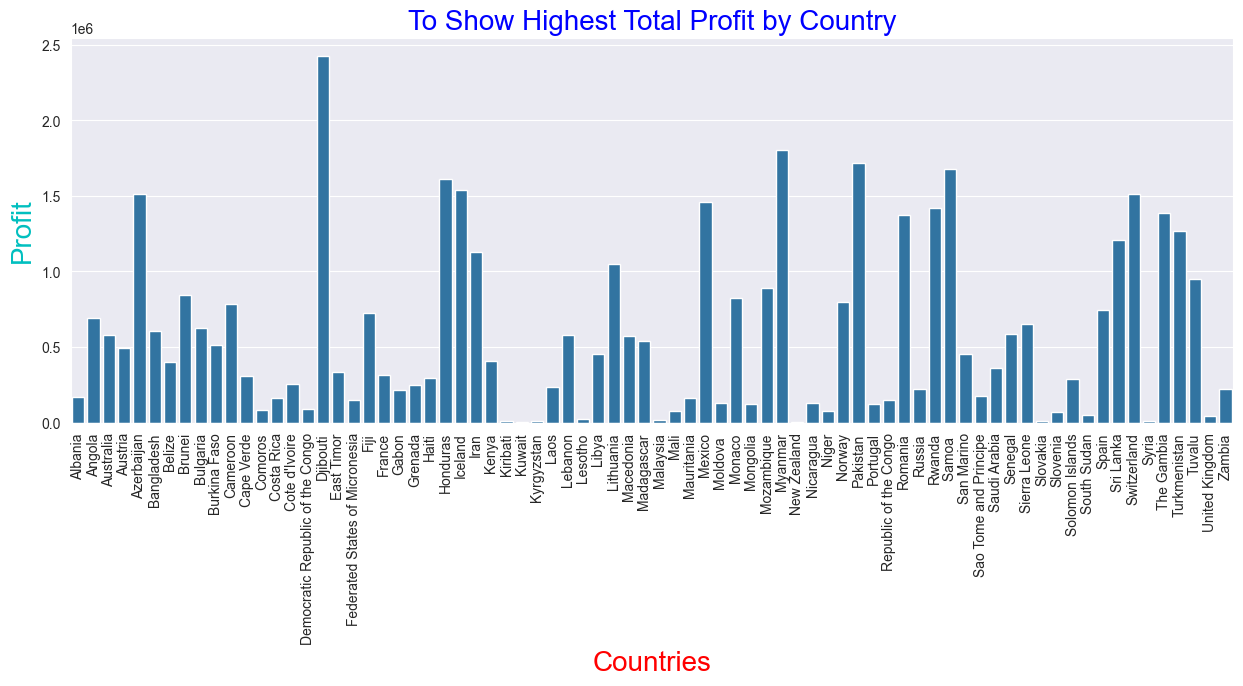

In [12]:
group_data = data.groupby(data['Country'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Highest Total Profit by Country', fontsize = 20, color = 'Blue')
plt.xlabel('Countries', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.show()


## How does the sales channel affect the order priority distribution?

In [13]:
# How does the sales channel affect the order priority distribution?
Sales_Channel_Order_Priority = data.groupby(data['Sales Channel'])['Order Priority'].value_counts().unstack()
Sales_Channel_Order_Priority

Order Priority,C,H,L,M
Sales Channel,,,,
Offline,13,17,12,8
Online,9,13,15,13


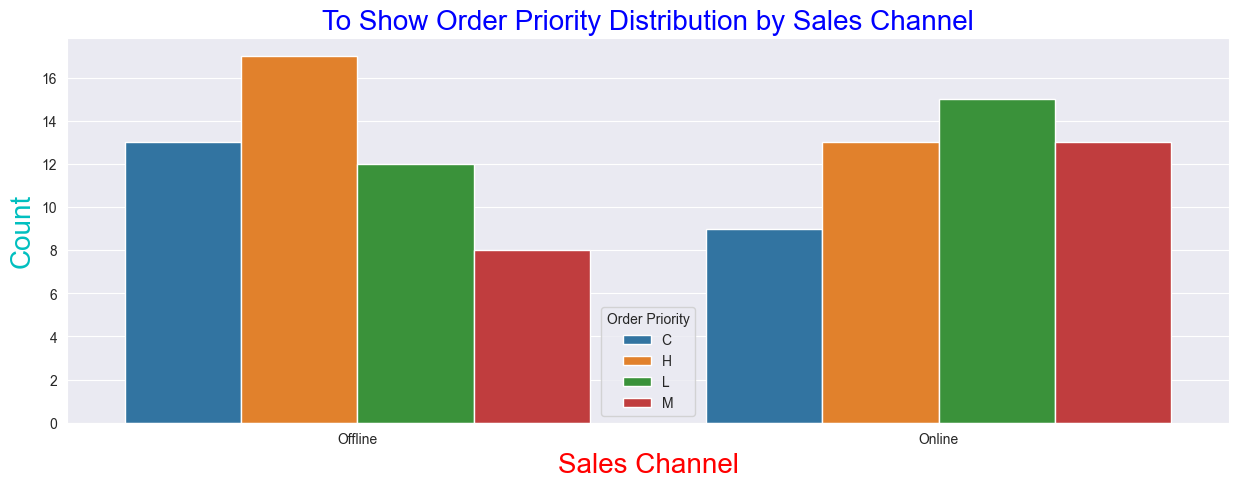

In [14]:
group_data = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count().reset_index(name = 'Count')

plt.figure(figsize=(15,5))
sns.barplot(x = 'Sales Channel', y = 'Count', hue = 'Order Priority', data = group_data)

plt.title('To Show Order Priority Distribution by Sales Channel', fontsize = 20, color = 'Blue')
plt.xlabel('Sales Channel', fontsize = 20, color = 'red')
plt.ylabel('Count', fontsize = 20, color = 'c')
plt.show()

## Which regions generate the highest and lowest total profits?

In [15]:
# Which regions generate the highest and lowest total profits?
Highest_Total_Profit = data.groupby(data['Region'])['Total Profit'].sum()
Highest_Total_Profit.idxmax()

'Sub-Saharan Africa'

In [16]:
Lowest_Total_Profit = data.groupby(data['Region'])['Total Profit'].sum()
Lowest_Total_Profit.idxmin()

'North America'

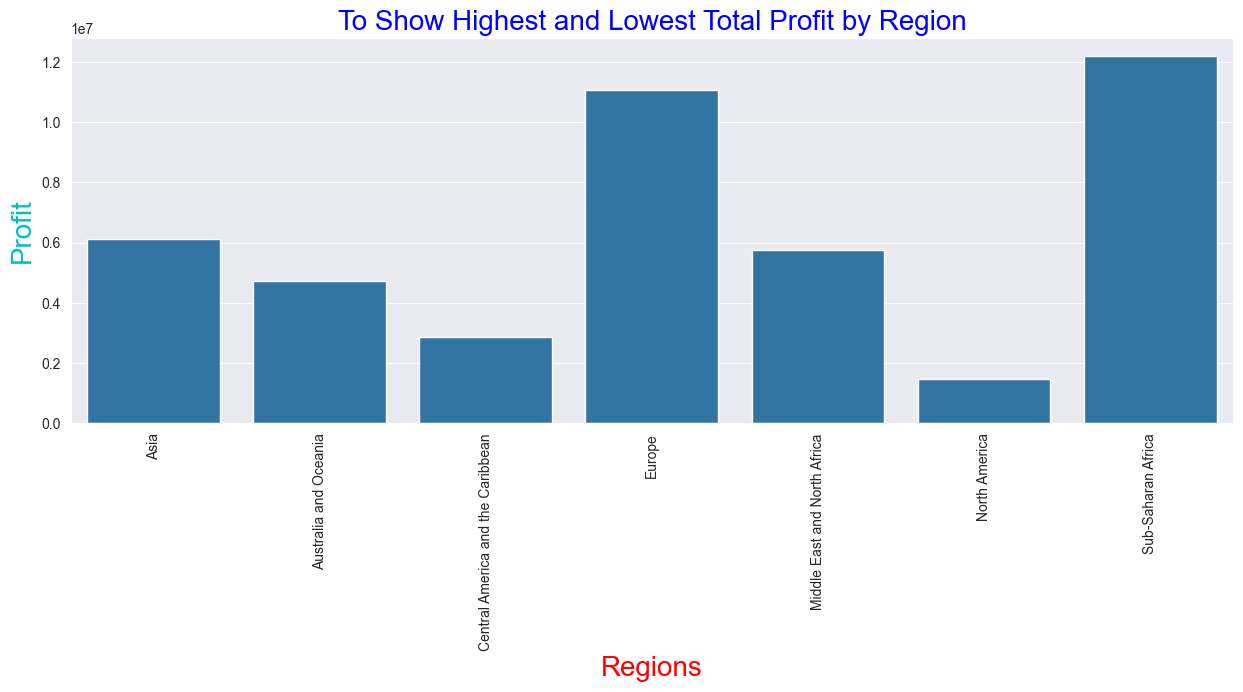

In [17]:
group_data = data.groupby(data['Region'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Highest and Lowest Total Profit by Region', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.show()

## What are the top 5 countries in terms of total revenue?

In [18]:
# What are the top 5 countries in terms of total revenue?
Top_5_Countries = data.groupby(['Country'])['Total Revenue'].sum().nlargest(5)
Top_5_Countries

Country
Honduras        6336545.48
Myanmar         6161257.90
Djibouti        6052890.86
Turkmenistan    5822036.20
Mexico          5643356.55
Name: Total Revenue, dtype: float64

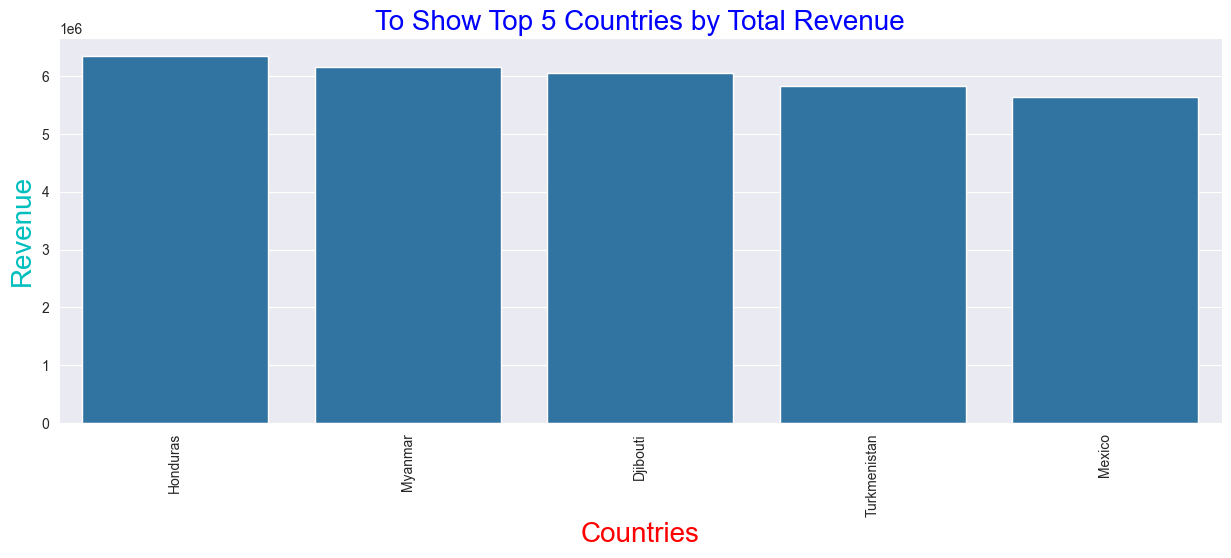

In [19]:
group_data = data.groupby(['Country'])['Total Revenue'].sum().nlargest(5)
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Top 5 Countries by Total Revenue', fontsize = 20, color = 'Blue')
plt.xlabel('Countries', fontsize = 20, color = 'red')
plt.ylabel('Revenue', fontsize = 20, color = 'c')
plt.show()

## Which item type contributes most to total profit across all regions?

In [20]:
# Which item type contributes most to total profit across all regions?
Item_Type_Contributes = data.groupby(['Item Type'])['Total Profit'].sum().nlargest(1)
Item_Type_Contributes

Item Type
Cosmetics    14556048.66
Name: Total Profit, dtype: float64

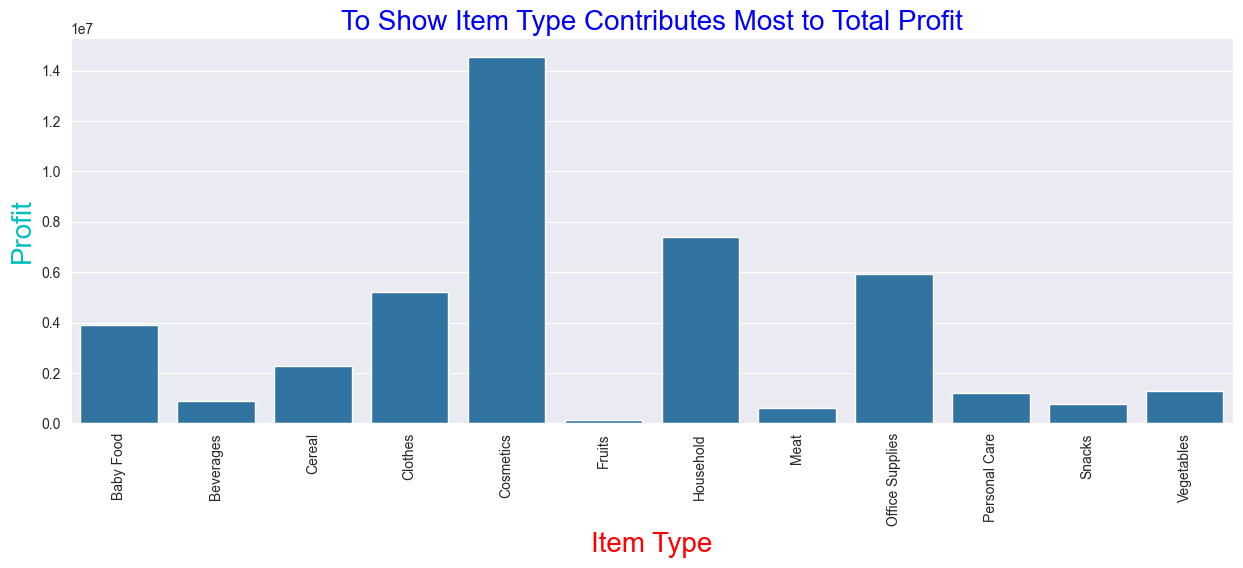

In [21]:
group_data = data.groupby(['Item Type'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Item Type Contributes Most to Total Profit', fontsize = 20, color = 'Blue')
plt.xlabel('Item Type', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.show()

## How does the sales channel (Online vs. Offline) impact total profit in Africa and Europe?

In [22]:
# How does the sales channel (Online vs. Offline) impact total profit in Africa and Europe?
Sales_Channel_Total_Profit = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().unstack()
Sales_Channel_Total_Profit

Sales Channel,Offline,Online
Region,,
Asia,3584286.33,2529559.54
Australia and Oceania,1886283.82,2835876.21
Central America and the Caribbean,2475814.99,371092.86
Europe,5574539.91,5508398.72
Middle East and North Africa,2169081.08,3592110.78
North America,1457942.76,NaN
Sub-Saharan Africa,7772777.78,4410433.62


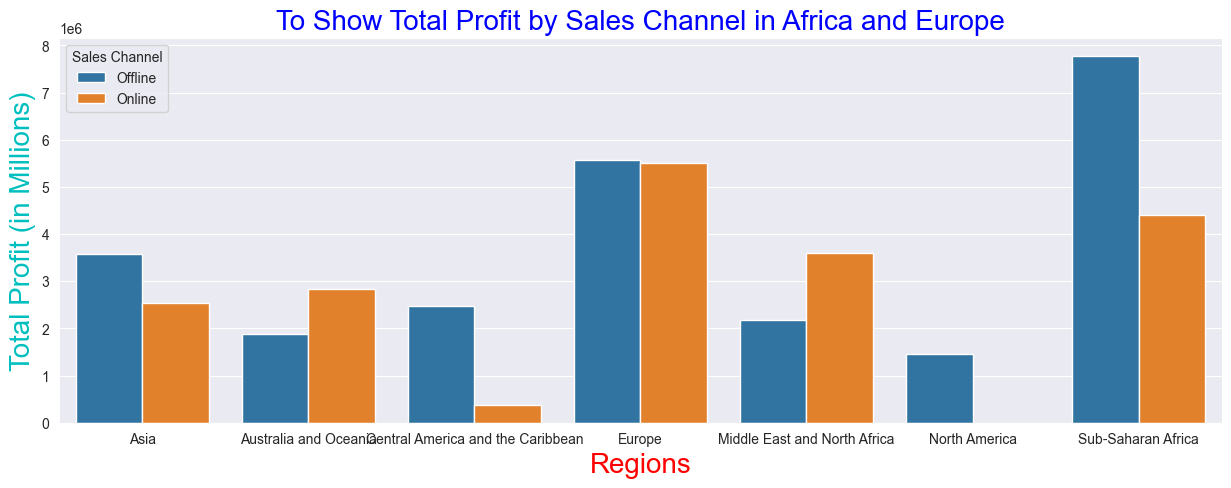

In [23]:
group_data = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().reset_index(name = 'Total Profit (in Millions)')
plt.figure(figsize=(15,5))
sns.barplot(x = 'Region', y = 'Total Profit (in Millions)', hue = 'Sales Channel', data = group_data)

plt.title('To Show Total Profit by Sales Channel in Africa and Europe', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Total Profit (in Millions)', fontsize = 20, color = 'c')
plt.show()

## Is there a significant difference in profits based on order priority levels (e.g., High vs. Low)?

In [24]:
# Is there a significant difference in profits based on order priority levels (e.g., High vs. Low)?
Order_Priority_Profit = data.groupby(['Order Priority'])['Total Profit'].sum()
Order_Priority_Profit

Order Priority
C     6748328.46
H    16891599.58
L    10858727.86
M     9669542.50
Name: Total Profit, dtype: float64

## Is there a correlation between units sold and total profit?

In [25]:
# Is there a correlation between units sold and total profit?
Units_Sold_Total_Profit = data[['Units Sold', 'Total Profit']]
Units_Sold_Total_Profit.corr()

,Units Sold,Total Profit
Units Sold,1.00000,0.56455
Total Profit,0.56455,1.00000


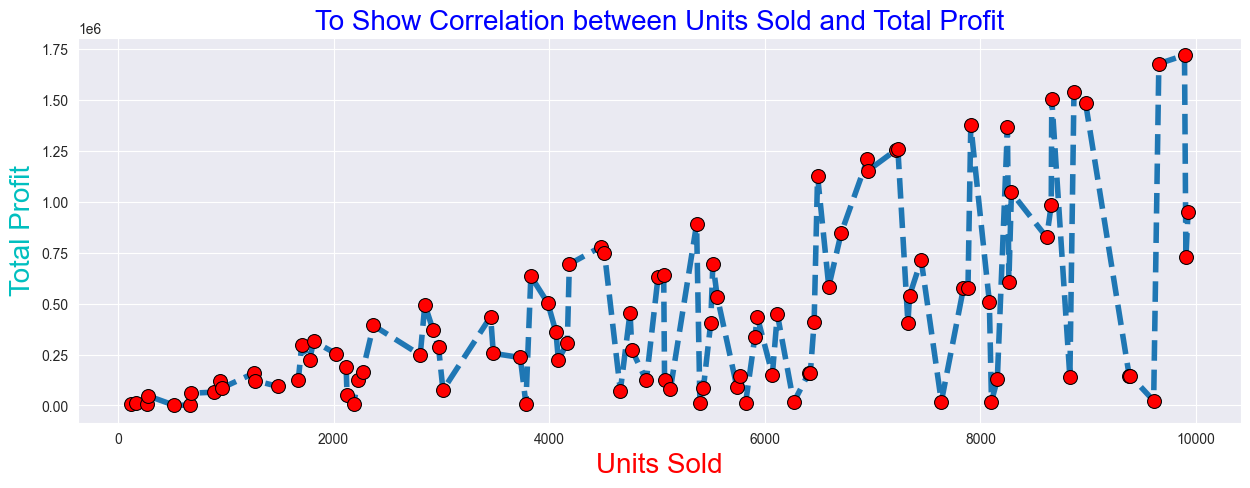

In [26]:
group_data = data.groupby(['Units Sold'])['Total Profit'].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x = group_data.index, y = group_data.values, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10, 
             markerfacecolor ='red', markeredgecolor ='black')

plt.title('To Show Correlation between Units Sold and Total Profit', fontsize = 20, color = 'Blue')
plt.xlabel('Units Sold', fontsize = 20, color = 'red')
plt.ylabel('Total Profit', fontsize = 20, color = 'c')
plt.show()

## Which item types have the highest profit margins (profit as a percentage of revenue)?

In [27]:
# Which item types have the highest profit margins (profit as a percentage of revenue)?
data['Profit Margin'] = data['Total Profit'] / data['Total Revenue'] * 100
Item_Type_Profit_Margin = data.groupby(['Item Type'])['Profit Margin'].mean()
Item_Type_Profit_Margin

Item Type
Baby Food          37.550924
Beverages          33.003161
Cereal             43.067574
Clothes            67.203514
Cosmetics          39.768984
Fruits             25.830654
Household          24.799856
Meat               13.558036
Office Supplies    19.386987
Personal Care      30.661936
Snacks             36.138419
Vegetables         40.977541
Name: Profit Margin, dtype: float64

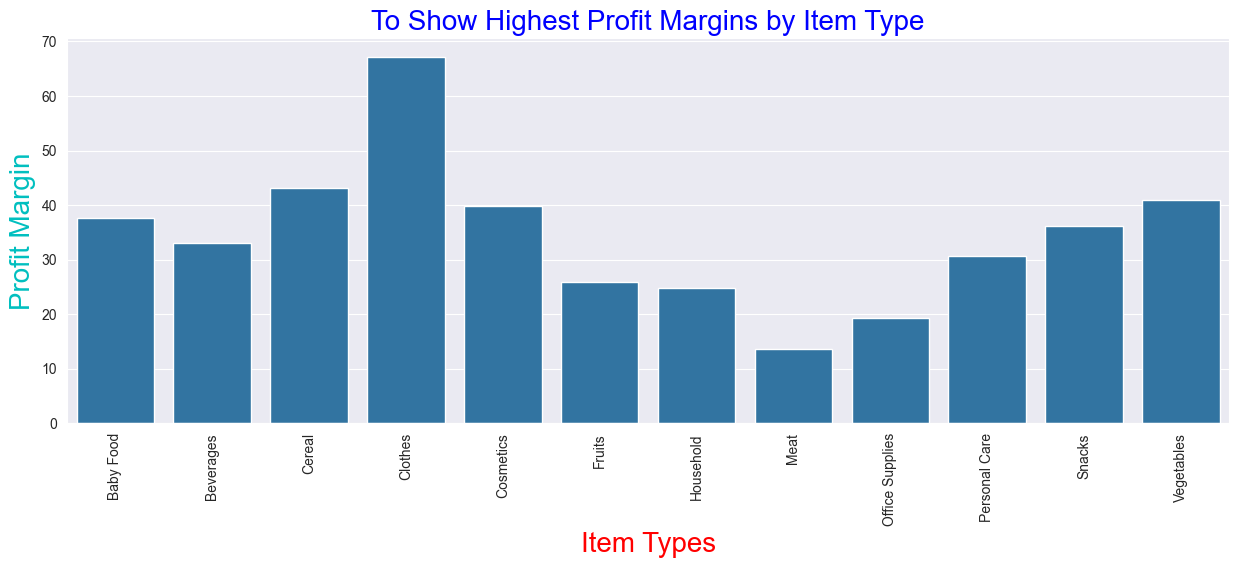

In [28]:
group_data = data.groupby(['Item Type'])['Profit Margin'].mean()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Highest Profit Margins by Item Type', fontsize = 20, color = 'Blue')
plt.xlabel('Item Types', fontsize = 20, color = 'red')
plt.ylabel('Profit Margin', fontsize = 20, color = 'c')
plt.show()

## How do unit prices vary across different regions?

In [29]:
# How do unit prices vary across different regions?
Unit_Prices_By_Region = data.groupby(['Region'])['Unit Price'].mean()
Unit_Prices_By_Region

Region
Asia                                 335.809091
Australia and Oceania                222.672727
Central America and the Caribbean    243.172857
Europe                               328.979545
Middle East and North Africa         241.506000
North America                        277.243333
Sub-Saharan Africa                   259.618889
Name: Unit Price, dtype: float64

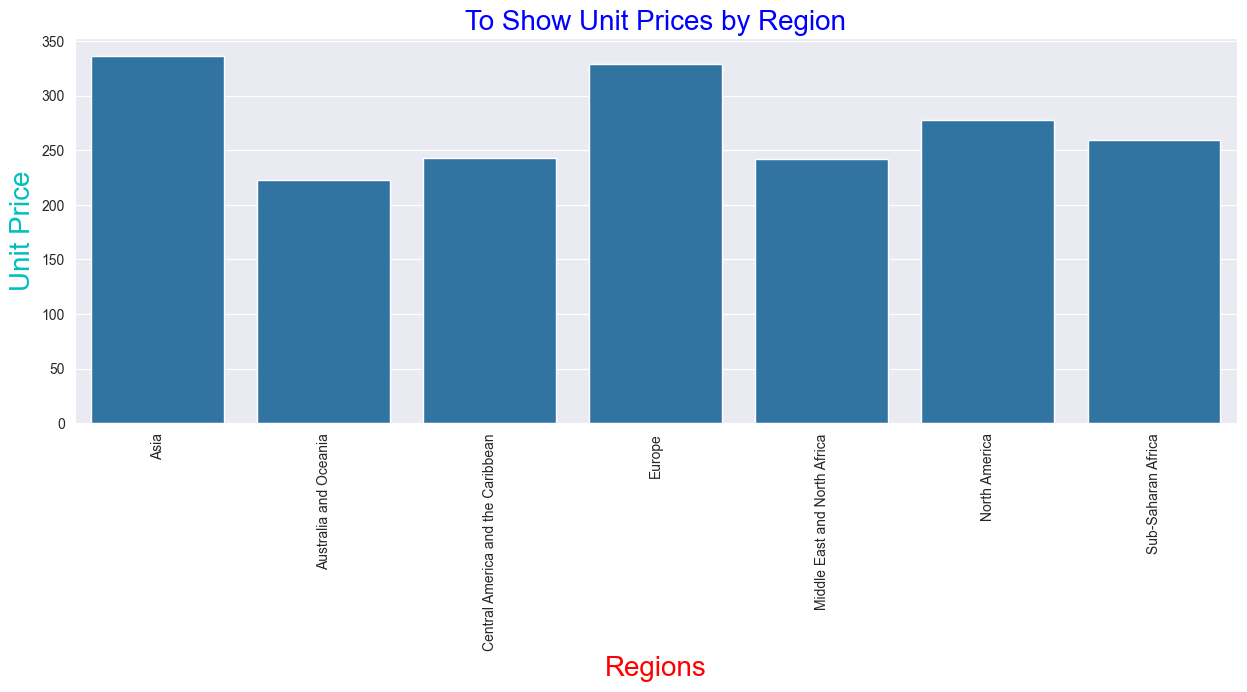

In [30]:
group_data = data.groupby(['Region'])['Unit Price'].mean()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Unit Prices by Region', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Unit Price', fontsize = 20, color = 'c')
plt.show()